* Design and implement a Neural Network of your choice on dataset of your choice. (Dataset must have at least 5 number of attributes )
* 1. Demonstrate over-fitting.
* 2. Apply regularization techniques (in different combinations and separately): 
*        (i) L1 (ii) L2 (iii) Drop-out
* 3. Visualize performance in terms of loss and accuracy per epoch for training and validation set. Also, visualize the performance of the model on the test set (Confusion matrix, F1 Score, Precision, Recall, ROC AUC)
*         (i) before applying regularization technique(s).
*        (ii) after applying regularization technique(s).

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
data = pd.read_csv('E:\Semisters\semister 6\DEEP LEARNING LAB\DEEP-LEARNING-LAB---AIC3970\WEEK 6\housing.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\FAIZ SIDDIQUI\AppData\Local\Temp\ipykernel_19648\741456589.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv('E:\Semisters\semister 6\DEEP LEARNING LAB\DEEP-LEARNING-LAB---AIC3970\WEEK 6\housing.csv')


In [30]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
data.shape

(20640, 10)

In [41]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [43]:
data[data.duplicated()]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [32]:
print(data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [33]:
# Fill null
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())


In [34]:
print(data.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [35]:
# Check duplicates
data.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of Ocean Proximity')

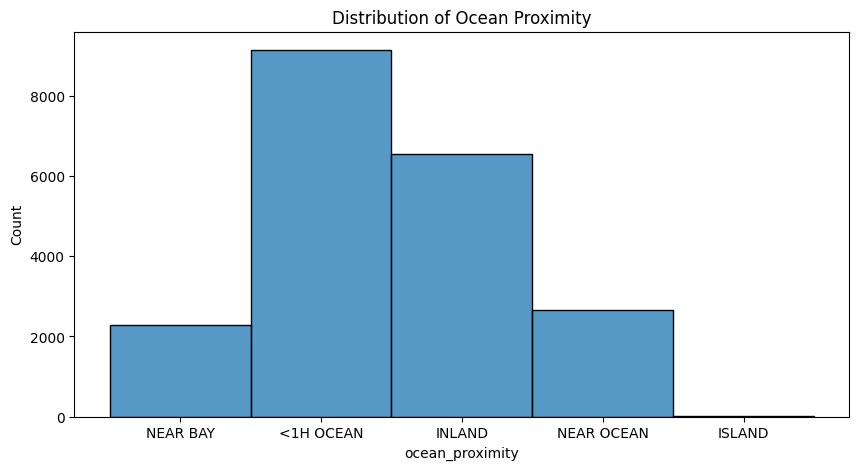

In [37]:
# EDA
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='ocean_proximity')

plt.title('Distribution of Ocean Proximity')

In [48]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
encoder = LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])

In [50]:
data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['longitude', 'latitude', 'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income'	,	'ocean_proximity'
]].values
y_reg = data['median_house_value']  # Regression target

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

print(f"Train shapes: {X_train.shape}, {X_test.shape}, {y_train_reg.shape},{y_test_reg.shape}")



Train shapes: (16512, 9), (4128, 9), (16512,),(4128,)


In [64]:

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, dropout_rate=0.3, l1_lambda=0.0, l2_lambda=0.0):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.dropout_rate = dropout_rate
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.dropout_mask = None

    def forward(self, inputs, training=True):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        if training and self.dropout_rate > 0:
            self.dropout_mask = np.random.rand(*self.output.shape) > self.dropout_rate
            self.output *= self.dropout_mask

    def backward(self, dvalues):
        if self.dropout_rate > 0:
            dvalues *= self.dropout_mask

        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

        # Apply L1 and L2 regularization
        if self.l1_lambda > 0:
            self.dweights += self.l1_lambda * np.sign(self.weights)
        if self.l2_lambda > 0:
            self.dweights += self.l2_lambda * self.weights


In [65]:

class Loss_MSE:
    def forward(self, y_pred, y_true):
        y_pred = y_pred.flatten()  # Ensure 1D
        y_true = y_true.flatten()  # Ensure 1D
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, y_pred, y_true):
        y_pred = y_pred.flatten()  # Ensure 1D
        y_true = y_true.flatten()  # Ensure 1D
        self.dinputs = -2 * (y_true - y_pred) / y_true.shape[0]


In [ ]:

def train_neural_network(X_train, y_train, X_val, y_val, model_structure, loss_function, learning_rate=0.01, epochs=100, batch_size=32, early_stopping=True):
    optimizer = Optimizer_SGD(learning_rate)
    layers = model_structure
    train_losses = []
    val_losses = []
    best_loss = float('inf')
    best_epoch = 0

    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            # Forward pass
            input_data = X_batch
            for layer in layers:
                layer.forward(input_data)
                input_data = layer.output

            loss = loss_function.forward(input_data, y_batch)
            epoch_loss += loss

            # Backward pass
            loss_function.backward(input_data, y_batch)
            gradient = loss_function.dinputs
            for layer in reversed(layers):
                layer.backward(gradient)
                gradient = layer.dinputs

            # Update parameters
            for layer in layers:
                optimizer.update_params(layer)

        avg_train_loss = epoch_loss / (X_train.shape[0] // batch_size)
        train_losses.append(avg_train_loss)

        # Compute validation loss
        input_data = X_val
        for layer in layers:
            layer.forward(input_data, training=False)
            input_data = layer.output
        val_loss = loss_function.forward(input_data, y_val)
        val_losses.append(val_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping based on validation loss
        if early_stopping and val_loss < best_loss:
            best_loss = val_loss
            best_epoch = epoch
        elif early_stopping and epoch - best_epoch >= 10:
            print(f"Early stopping at epoch {epoch}")
            break

    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print(f"Best validation loss: {best_loss:.4f} at epoch {best_epoch}")


Training Neural Network for California Housing Regression


ValueError: Data must be 1-dimensional, got ndarray of shape (32, 32) instead